Assignment1: 

Module: Data Mining and ML
Week1 and Lab1

"Assignment reads Sample_data.csv file that has 6 months time period (1 Jan till 30 Jun 2023) grocery store transactional data, displaying various categories such as Coffee, Tea etc. and it's sub-categories transactions along with quantity and price"

"Objective of this assignment is to read the sample_data file, understand the data and perform analysis on data with some visualization" 


In [141]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Inference:
Imported the libraries to read csv data using pandas and plot visualizations using matplotlib and seaborn

In [142]:
# Load the data from Sample_data.csv file
data = pd.read_csv("Sample_data.csv")
data.head()

,id,product_id,category,type,detail,store_id,store_loc,date,time,qty,unit_price
0,1,32,Coffee,Gourmet brewed coffee,Ethiopia Rg,5,Lower Manhattan,01/01/2023,07:06:11,2,3.0
1,2,57,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,5,Lower Manhattan,01/01/2023,07:08:56,2,3.1
2,3,59,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,5,Lower Manhattan,01/01/2023,07:14:04,2,4.5
3,4,22,Coffee,Drip coffee,Our Old Time Diner Blend Sm,5,Lower Manhattan,01/01/2023,07:20:24,1,2.0
4,5,57,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,5,Lower Manhattan,01/01/2023,07:22:41,2,3.1


Inference:
Displaying the first 5 sample rows of the entire raw data as is

In [143]:
# Check the datatypes of the data, furthermore null values and the number of entries
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          149116 non-null  int64  
 1   product_id  149116 non-null  int64  
 2   category    149116 non-null  object 
 3   type        149116 non-null  object 
 4   detail      149116 non-null  object 
 5   store_id    149116 non-null  int64  
 6   store_loc   149116 non-null  object 
 7   date        149116 non-null  object 
 8   time        149116 non-null  object 
 9   qty         149116 non-null  int64  
 10  unit_price  149116 non-null  float64
dtypes: float64(1), int64(4), object(6)
memory usage: 12.5+ MB


Inference:
- There are 11 columns in the dataset, off which 4 are numerical fields and rest 6 are categorical fields
- Dataset has 149116 records in total
- There are no null values in any of the columns in the dataset

In [144]:
# Check the start and end dates of the transaction data

from datetime import datetime

data['date_updated'] = data.apply(lambda x: datetime.strptime(x['date'], '%d/%m/%Y'), axis=1)

print(f"Start Date of Transaction data: {data['date_updated'].min()}")
print(f"End Date of Transaction data: {data['date_updated'].max()}")

Start Date of Transaction data: 2023-01-01 00:00:00
End Date of Transaction data: 2023-06-30 00:00:00


Inference:
Store's transactional data is between Jan 1st till June 30th 2023

In [145]:
# Drop the date_updated field from the dataset
data.drop('date_updated', axis=1, inplace=True)

In [146]:
# Understand statistics of the entire data
data.describe()

,id,product_id,store_id,qty,unit_price
count,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,47.918607,5.342063,1.438276,3.382219
std,43153.600016,17.930020,2.074241,0.542509,2.658723
min,1.000000,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,33.000000,3.000000,1.000000,2.500000
50%,74727.500000,47.000000,5.000000,1.000000,3.000000
75%,112094.250000,60.000000,8.000000,2.000000,3.750000
max,149456.000000,87.000000,8.000000,8.000000,45.000000


Inference:
- Ignoring the statistics of id, product_id, and store_id columns as these are key/identifier columns
- During all 6 months, a maximum of 8 products were purchased in a day. Furthermoer, a majority (50%) of the transactions were around a single product purchase, followed by a couple products purchase found at 75 percentile
- Similarly, during all 6 month transactions, a unit price of 45 was maximum and most of the transactions were between price of 0.8 - 4

In [147]:
# check the column names
data.columns

Index(['id', 'product_id', 'category', 'type', 'detail', 'store_id',
       'store_loc', 'date', 'time', 'qty', 'unit_price'],
      dtype='object')

Inference:
There are 11 columns in the dataset as above

In [148]:
# Remove product_id column from the dataset
data.drop('product_id', axis=1, inplace=True)

Inference:
Dropping the field "product_id"

In [149]:
# Check the data after removing the product_id column
data.head()

,id,category,type,detail,store_id,store_loc,date,time,qty,unit_price
0,1,Coffee,Gourmet brewed coffee,Ethiopia Rg,5,Lower Manhattan,01/01/2023,07:06:11,2,3.0
1,2,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,5,Lower Manhattan,01/01/2023,07:08:56,2,3.1
2,3,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,5,Lower Manhattan,01/01/2023,07:14:04,2,4.5
3,4,Coffee,Drip coffee,Our Old Time Diner Blend Sm,5,Lower Manhattan,01/01/2023,07:20:24,1,2.0
4,5,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,5,Lower Manhattan,01/01/2023,07:22:41,2,3.1


In [150]:
# Display information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          149116 non-null  int64  
 1   category    149116 non-null  object 
 2   type        149116 non-null  object 
 3   detail      149116 non-null  object 
 4   store_id    149116 non-null  int64  
 5   store_loc   149116 non-null  object 
 6   date        149116 non-null  object 
 7   time        149116 non-null  object 
 8   qty         149116 non-null  int64  
 9   unit_price  149116 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 11.4+ MB


Inference:
- There are 11 columns in the dataset, off which 4 are numerical fields and rest 6 are categorical fields
- Dataset has 149116 records in total
- There are no null values in any of the columns in the dataset

In [151]:
# Addition of a new column 'total' which is the product of 'qty' and 'unit_price'
data['total'] = data['qty'] * data['unit_price']

Inference:
Creating an additional field "Total" that populates the total price of each transaction

In [152]:
# Check the data after adding the new column 'total'
data.head()

,id,category,type,detail,store_id,store_loc,date,time,qty,unit_price,total
0,1,Coffee,Gourmet brewed coffee,Ethiopia Rg,5,Lower Manhattan,01/01/2023,07:06:11,2,3.0,6.0
1,2,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,5,Lower Manhattan,01/01/2023,07:08:56,2,3.1,6.2
2,3,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,5,Lower Manhattan,01/01/2023,07:14:04,2,4.5,9.0
3,4,Coffee,Drip coffee,Our Old Time Diner Blend Sm,5,Lower Manhattan,01/01/2023,07:20:24,1,2.0,2.0
4,5,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,5,Lower Manhattan,01/01/2023,07:22:41,2,3.1,6.2


In [153]:
# Check for missing values in the data
data.isnull().sum()

id            0
category      0
type          0
detail        0
store_id      0
store_loc     0
date          0
time          0
qty           0
unit_price    0
total         0
dtype: int64

Inference:
There are no fields with missing values in the given input data set and kind off make sense as there would not be a real-time transaction with 0 amount or null value unless an error entry

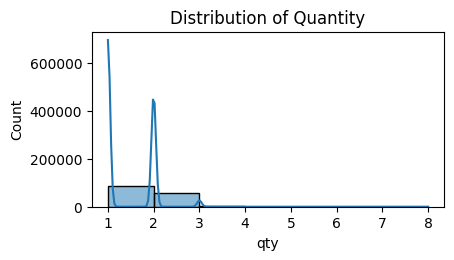

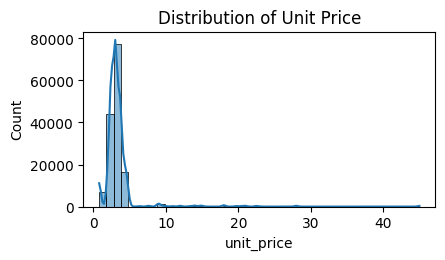

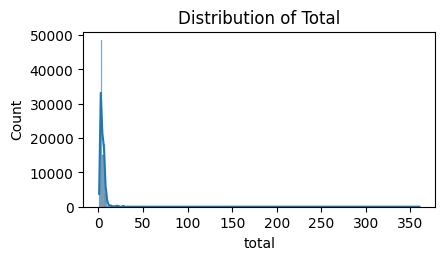

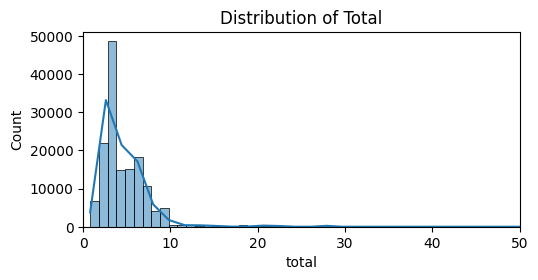

In [154]:
# Plot the distribution of variables such as Quantity, Unit Price, and Total
plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 1)
sns.histplot(data['qty'], kde=True, binwidth=1)
plt.title('Distribution of Quantity')

plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 2)
sns.histplot(data['unit_price'], kde=True, binwidth=1)
plt.title('Distribution of Unit Price')

plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 3)
# plt.xlim(0, 350)
sns.histplot(data['total'], kde=True, binwidth=1)
plt.title('Distribution of Total')

# Plot the distribution of variable Total ranging only between 0-50 to get a better understanding
plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 4)
plt.xlim(0, 50)
sns.histplot(data['total'], kde=True, binwidth=1, bins=10)
plt.title('Distribution of Total')

plt.tight_layout()
plt.show()

Inference:
- Plot 1 is the "Distribution of Quantity" plot, where the bars (histogram) says that the single followed by double quantity products were purchased at the most. The Kernel Density Estimate curve signifies that frequency of single quantity products were extremely high followed by double quantity products that were purchased 25% lesser than single quantity products.
- Plot 2 is the "Distribution of Unit Price" plot, where the bars (histogram) says that the unit price worth 3-4 had highest transactions i.e. over 75k transactions, followed by 2-3 priced with over 40k transactions, and unit priced between 1-2 and 4-5 had transactions combined less than 20k.
- Since plot 3 is skewed, considering the plot 4, where most profits during 6 months were of each transaction bill ranging between 3-4, followed by 50% dip in sales for 2-3. However, a good amount of transactions of total bill 6-7 is been observed.

In [155]:
# Check the filtered data for the category 'Coffee'
data[data['category'] == 'Coffee'].head()

,id,category,type,detail,store_id,store_loc,date,time,qty,unit_price,total
0,1,Coffee,Gourmet brewed coffee,Ethiopia Rg,5,Lower Manhattan,01/01/2023,07:06:11,2,3.00,6.00
3,4,Coffee,Drip coffee,Our Old Time Diner Blend Sm,5,Lower Manhattan,01/01/2023,07:20:24,1,2.00,2.00
6,7,Coffee,Drip coffee,Our Old Time Diner Blend Sm,5,Lower Manhattan,01/01/2023,07:25:49,1,2.00,2.00
7,8,Coffee,Gourmet brewed coffee,Columbian Medium Roast Sm,5,Lower Manhattan,01/01/2023,07:33:34,2,2.00,4.00
8,9,Coffee,Barista Espresso,Latte Rg,5,Lower Manhattan,01/01/2023,07:39:13,1,4.25,4.25


Inference:
Filter the dataset for coffee to draw some conclusions around category coffee sales

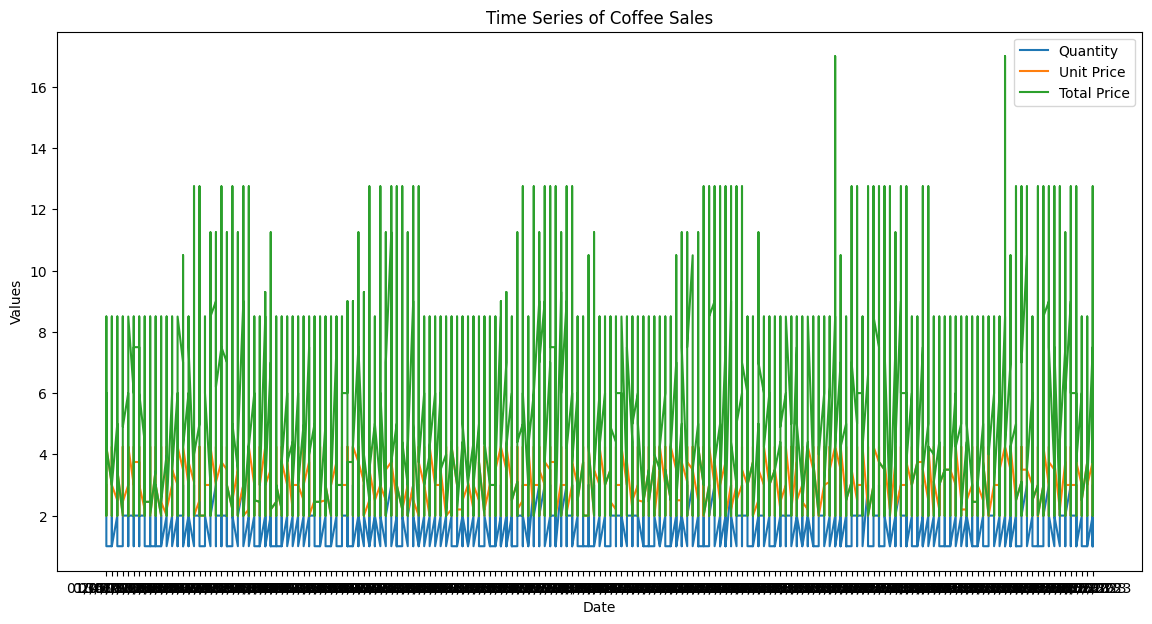

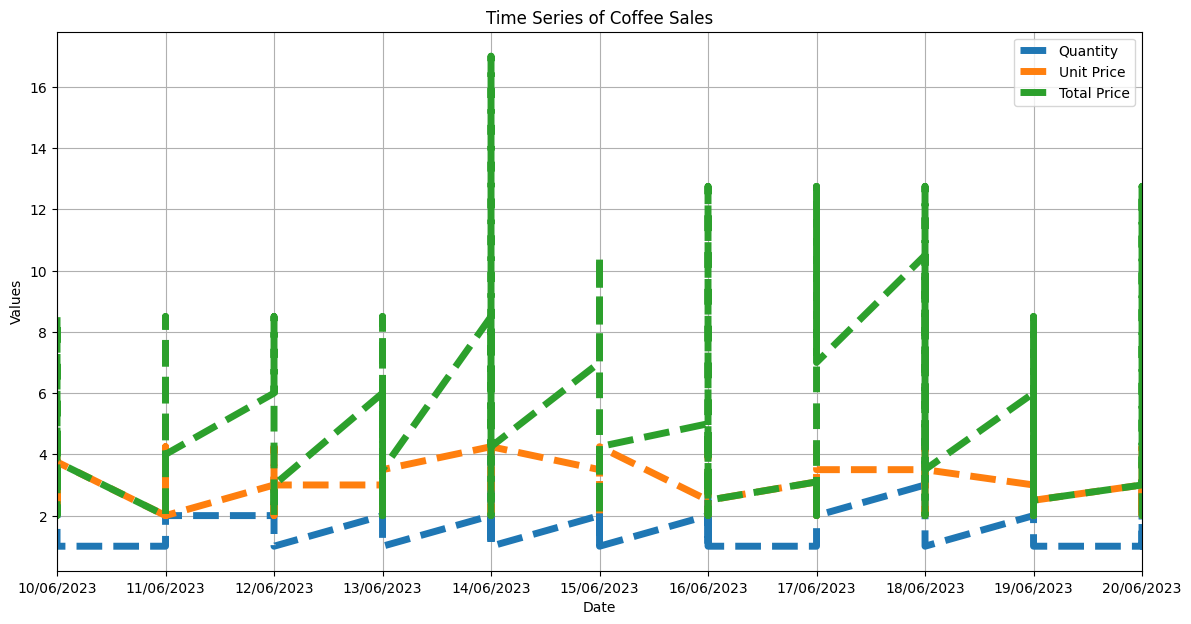

In [157]:
# Slice the coffee data from the entire data
coffee_data = data[data['category'] == 'Coffee']

# Plot the time series of Quantity, Unit Price, and Total Price of Coffee
plt.figure(figsize=(14, 7))
plt.plot(coffee_data['date'], coffee_data['qty'], label='Quantity')
plt.plot(coffee_data['date'], coffee_data['unit_price'], label='Unit Price') 
plt.plot(coffee_data['date'], coffee_data['total'], label='Total Price')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Time Series of Coffee Sales') 
plt.legend()
plt.show()

# Plot the time series of Quantity, Unit Price, and Total Price of Coffee for only the dates between 16th till 19th of Jan 2023 for better understanding
plt.figure(figsize=(14, 7)) 
plt.xlim(160, 170)
plt.plot(coffee_data['date'], coffee_data['qty'], label='Quantity', linestyle="--", linewidth=5)
plt.plot(coffee_data['date'], coffee_data['unit_price'], label='Unit Price', linestyle="--", linewidth=5) 
plt.plot(coffee_data['date'], coffee_data['total'], label='Total Price', linestyle="--", linewidth=5)
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Time Series of Coffee Sales') 
plt.legend()
plt.grid(True)
plt.show()

Infernece:
A line plot is drawn between 3 important quantitative variables i.e. qty, unit price and total price of each transaction of "coffee sales" and due to skewness of plot 1, drew an another plot 2 above for 11 days between 10th Jun till 20th Jun 2023, and found that during the month of June especially later half there are more coffee sales with a maximum of 17 amounted on 14th June 2023

Conclusion:
- There are no nulls in the given dataset
- Data consist of 6 months transactions between Jan 1st - Jun 30th 2023 with oer 147k transactions
- Single or double quantity per transaction were the most to the store
- Majorly unit price amount between 3-4 had over 75k transactions followed by 2-3 with over 40k and 1-2, 4-5 with over 20k transactions
- As per above two inferences, it is clear that transactions with total price ranging between 3-4 made highest transactions followed by 2-3, and is found to be true
- Surprisingly, after total price ranging between 2-4, 6-7 showcased higher transactions. It could be inferred that these are due to high priced and higher quantity purchases
- Lastly, coffee sales shown a higher sales during the month of June with a sales of 16 amount on 14th of June 2023